In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd

In [ ]:
filename = 'param-exploration-6.0-6.0-0.2-6.0'
path = '/work/jp464/striatum-sequence/exploration/' + filename + '.npz'
data = np.load(path) 
overlaps_ctx = data['overlaps_ctx']
overlaps_d1 = data['overlaps_d1']

In [188]:
def fpeaks(overlaps):
    peaks = np.array([])
    for m_p in overlaps:
        peaks = np.append(peaks, find_peaks(m_p, height=.3, prominence=.05)[0])
    peaks.sort()
    return peaks 

In [189]:
def retrieval_speed(overlaps, tau=10):
    peaks = fpeaks(overlaps)
    print(peaks)
    if len(peaks) == 0:
        return 0
    sum = 0
    for i in range(1, len(peaks)):
        sum += (peaks[i] - peaks[i-1])
    return tau / (sum / (len(peaks)-1))

In [190]:
retrieval_speed(overlaps_ctx)

[ 311.  890. 1170. 1418.]


0.02710027100271003

In [191]:
def plot_peaks(overlaps):
    peaks = fpeaks(overlaps)
    const = [.5 for i in peaks]
    for m in overlaps:
        plt.plot(m)
    plt.scatter(peaks, const, color='r')
    plt.show()

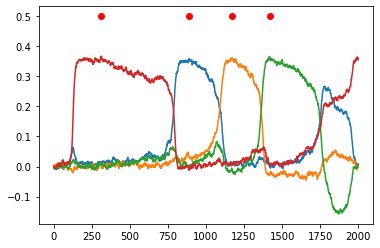

In [192]:
plot_peaks(overlaps_ctx)

In [8]:
pd.set_option('display.max_rows', None)
pd.read_hdf('/work/jp464/striatum-sequence/output/retrieval_speed.h5', 'data')

,Acc,Abc,Acb,Abb,v_ctx,v_bg,seq


In [7]:
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print(np.meshgrid(_x, _y)[0])

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


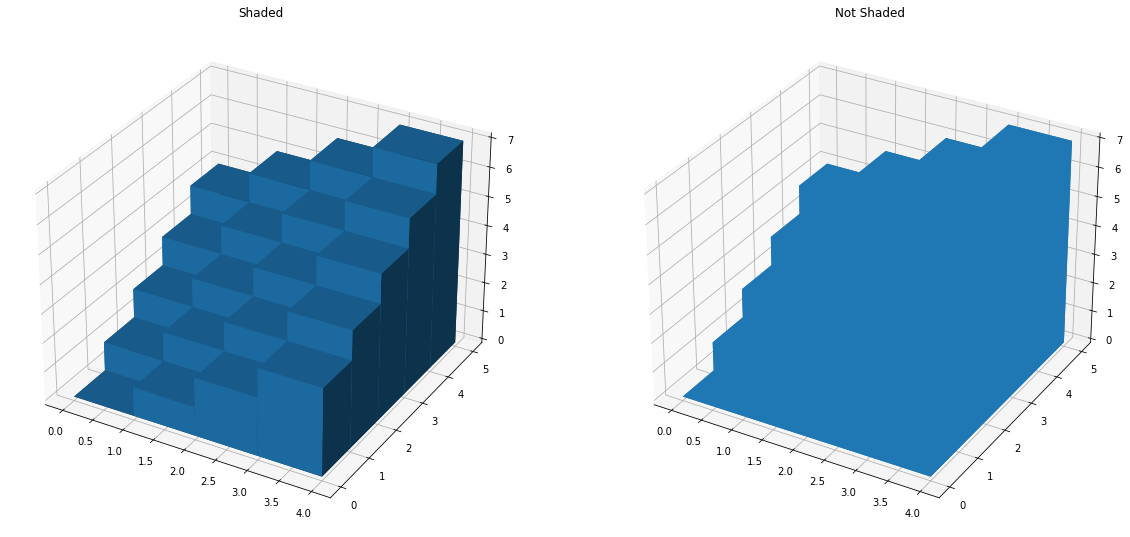

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()